In [50]:
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.model_selection import train_test_split


## Step 1: Exploratory Data Analysis (EDA) & Data Quality Report

In [23]:
data = pd.read_csv('hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [25]:
data.describe

<bound method NDFrame.describe of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27

In [26]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [27]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [28]:
nan_cols = data.columns[data.isna().any()].tolist()

print("Columns with missing values:\n ")

for col in nan_cols:
    missing_percent = data[col].isna().sum() / len(data) * 100
    print(f"{col}: {missing_percent}% ")


Columns with missing values:
 
children: 0.003350364352123293% 
country: 0.40874445095904177% 
agent: 13.686238378423655% 
company: 94.30689337465449% 


In [29]:
for col in nan_cols:
    print(f"{col}: datatype--> {data[col].dtype} , with {data[col].nunique()} unique values")

children: datatype--> float64 , with 5 unique values
country: datatype--> object , with 177 unique values
agent: datatype--> float64 , with 333 unique values
company: datatype--> float64 , with 352 unique values


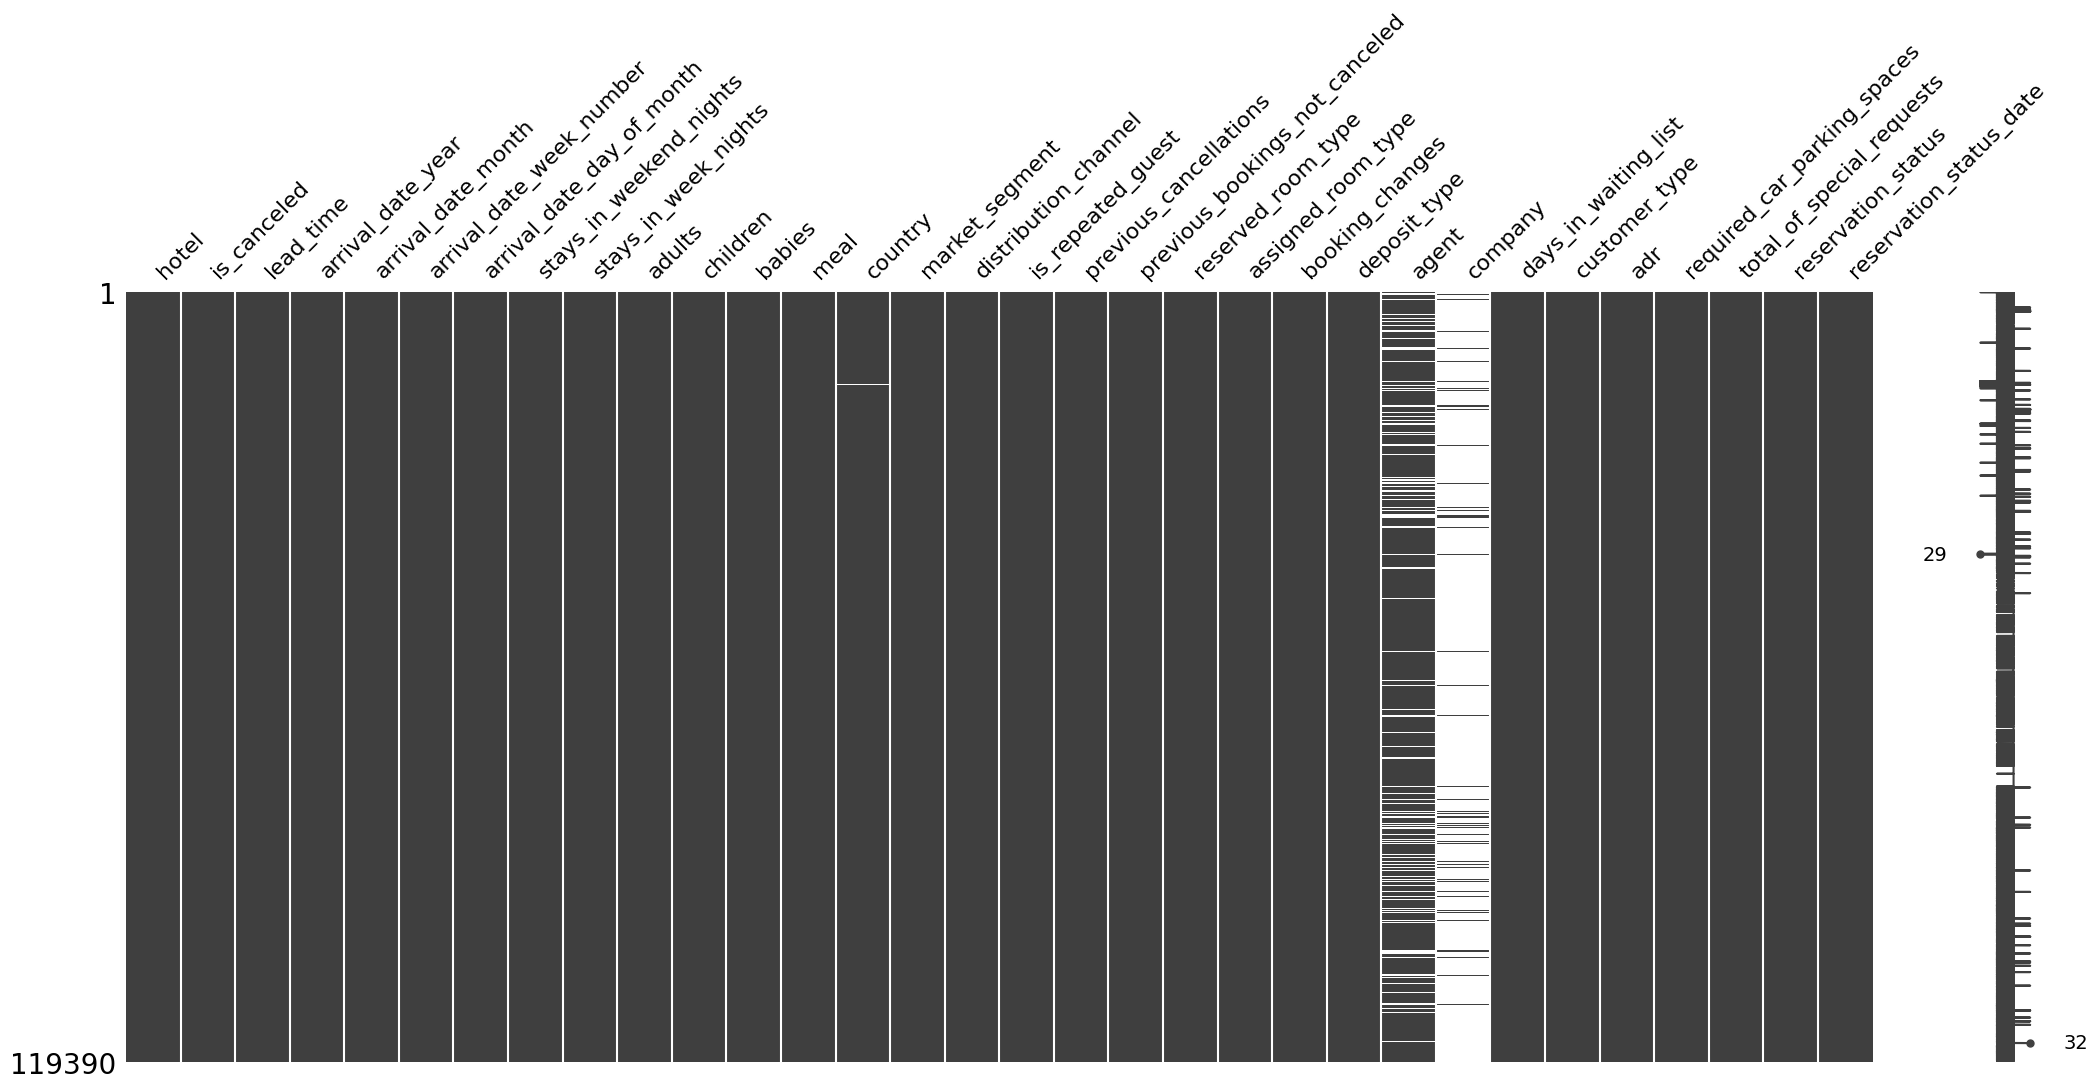

In [30]:
msno.matrix(data)
plt.show()

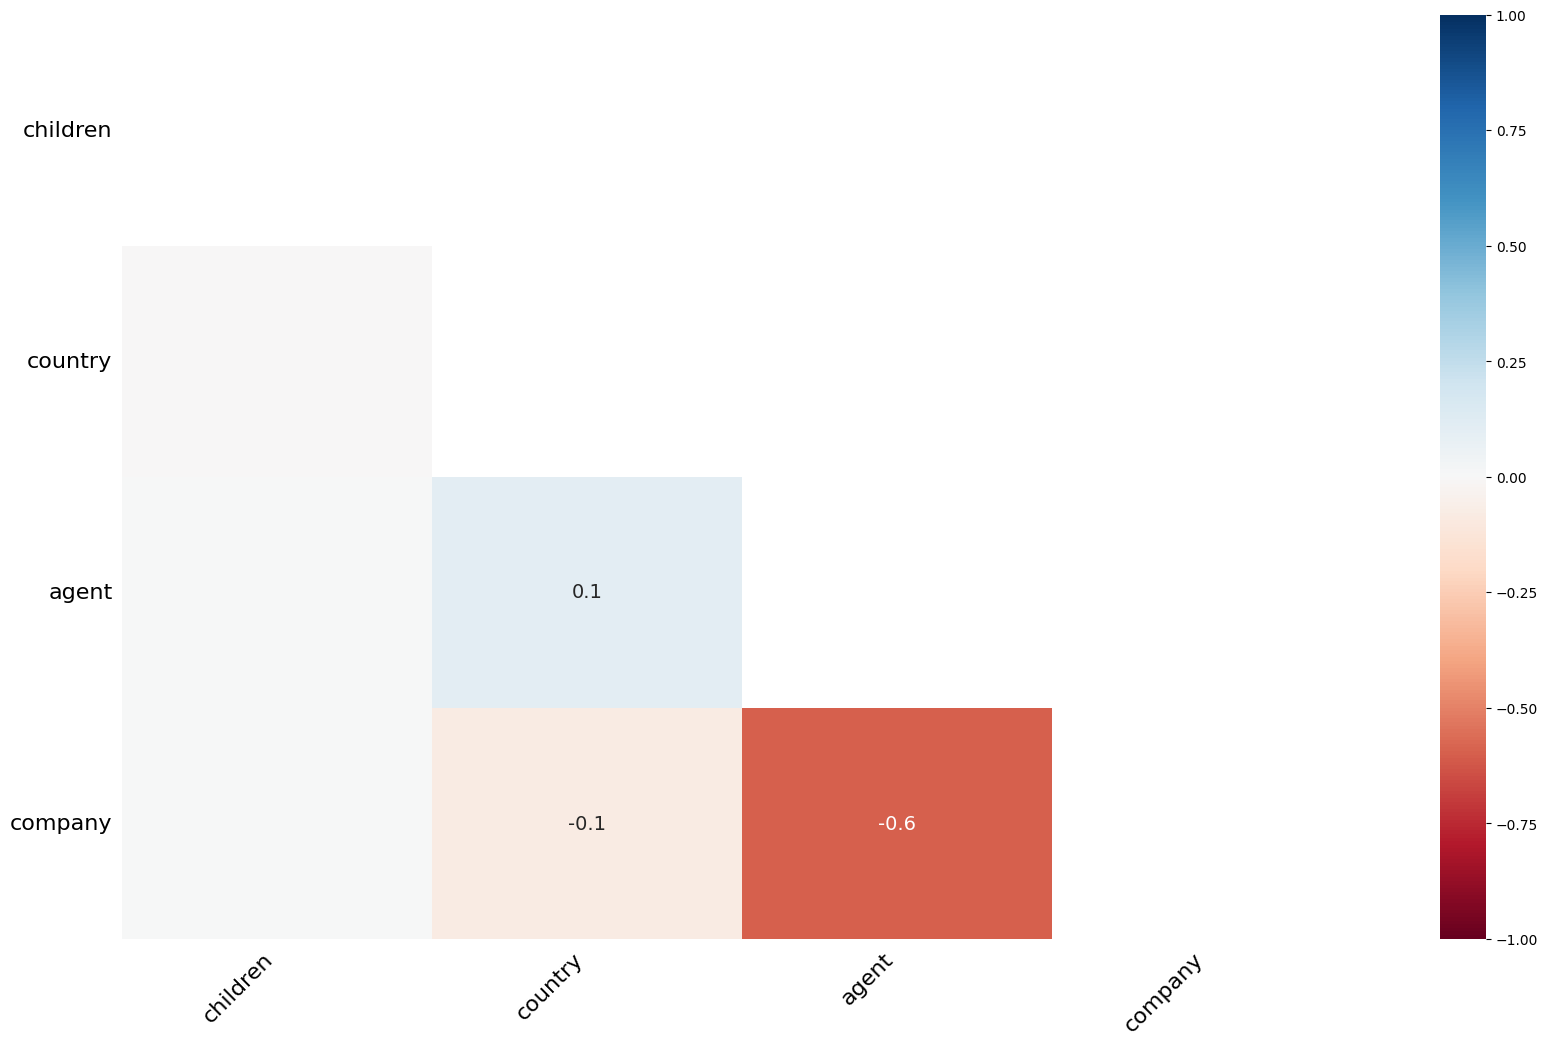

In [31]:
msno.heatmap(data)
plt.show()

In [32]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", numerical_cols)

Numerical columns: Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


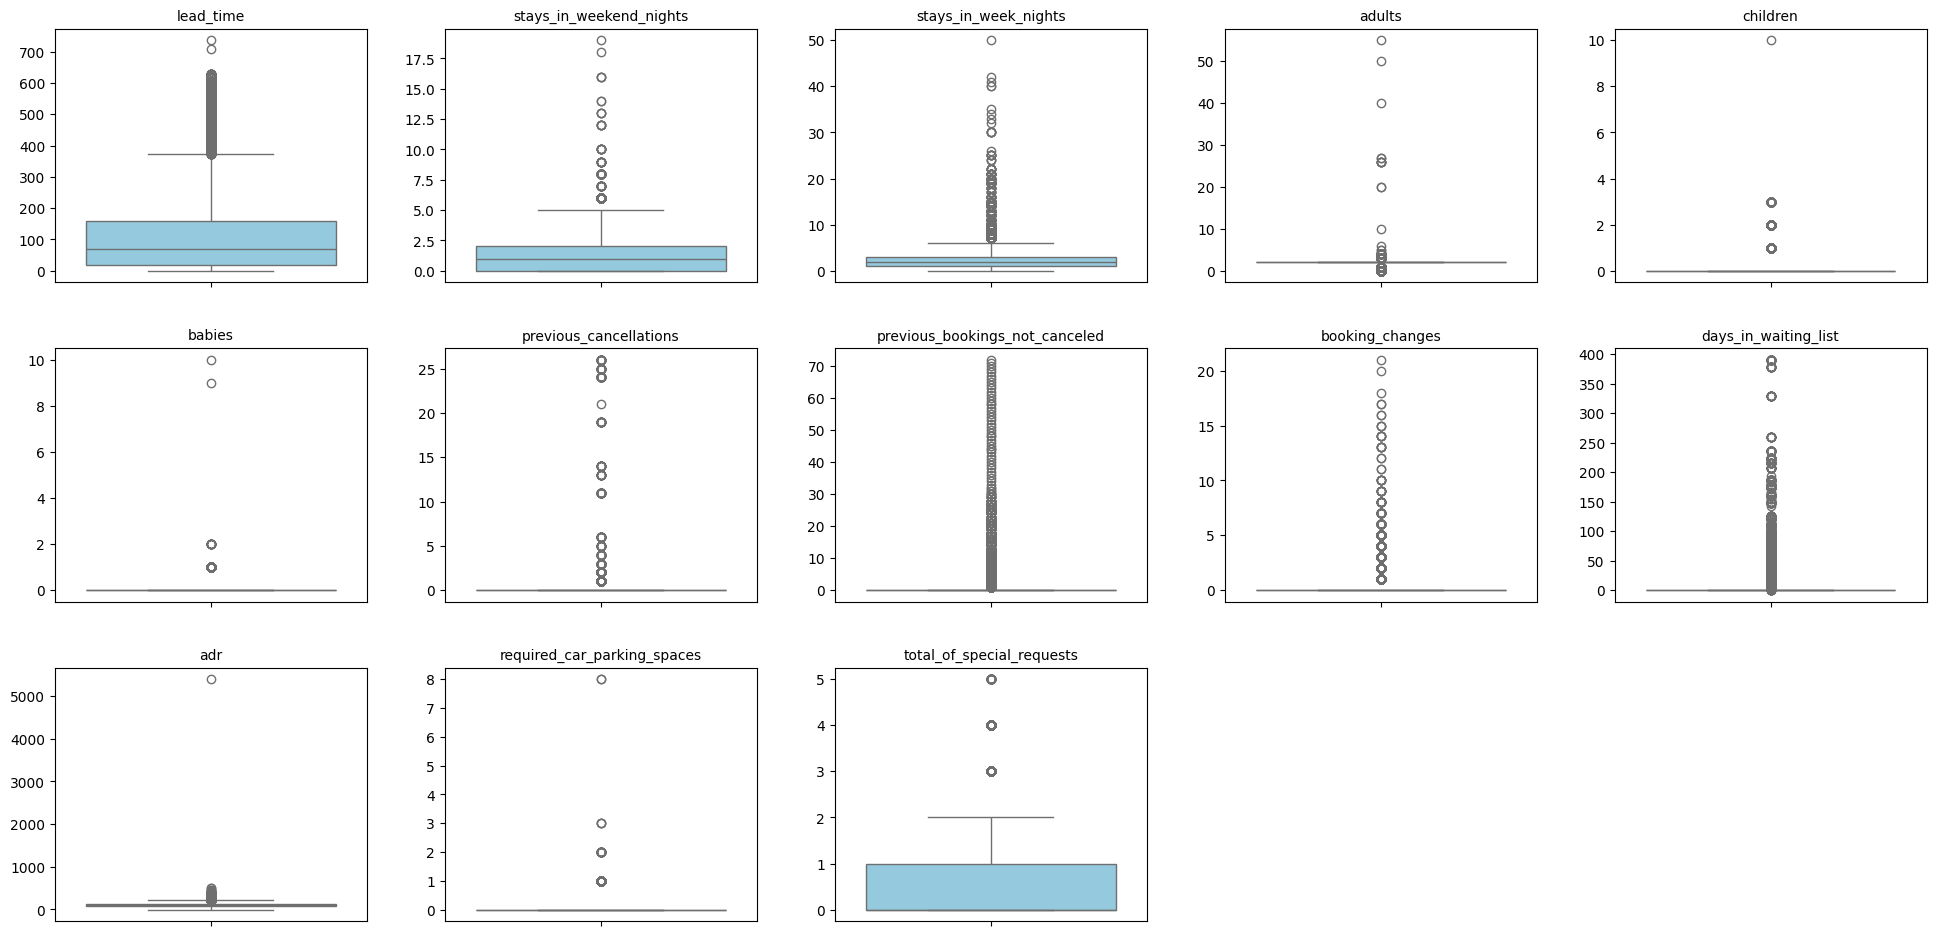

In [33]:
cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
        'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled',
        'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
        'total_of_special_requests']

plt.figure(figsize=(20, 10))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(y=data[col], color="skyblue")
    plt.title(col, fontsize=10)
    plt.ylabel("")

plt.tight_layout(pad=3.0)
plt.show()


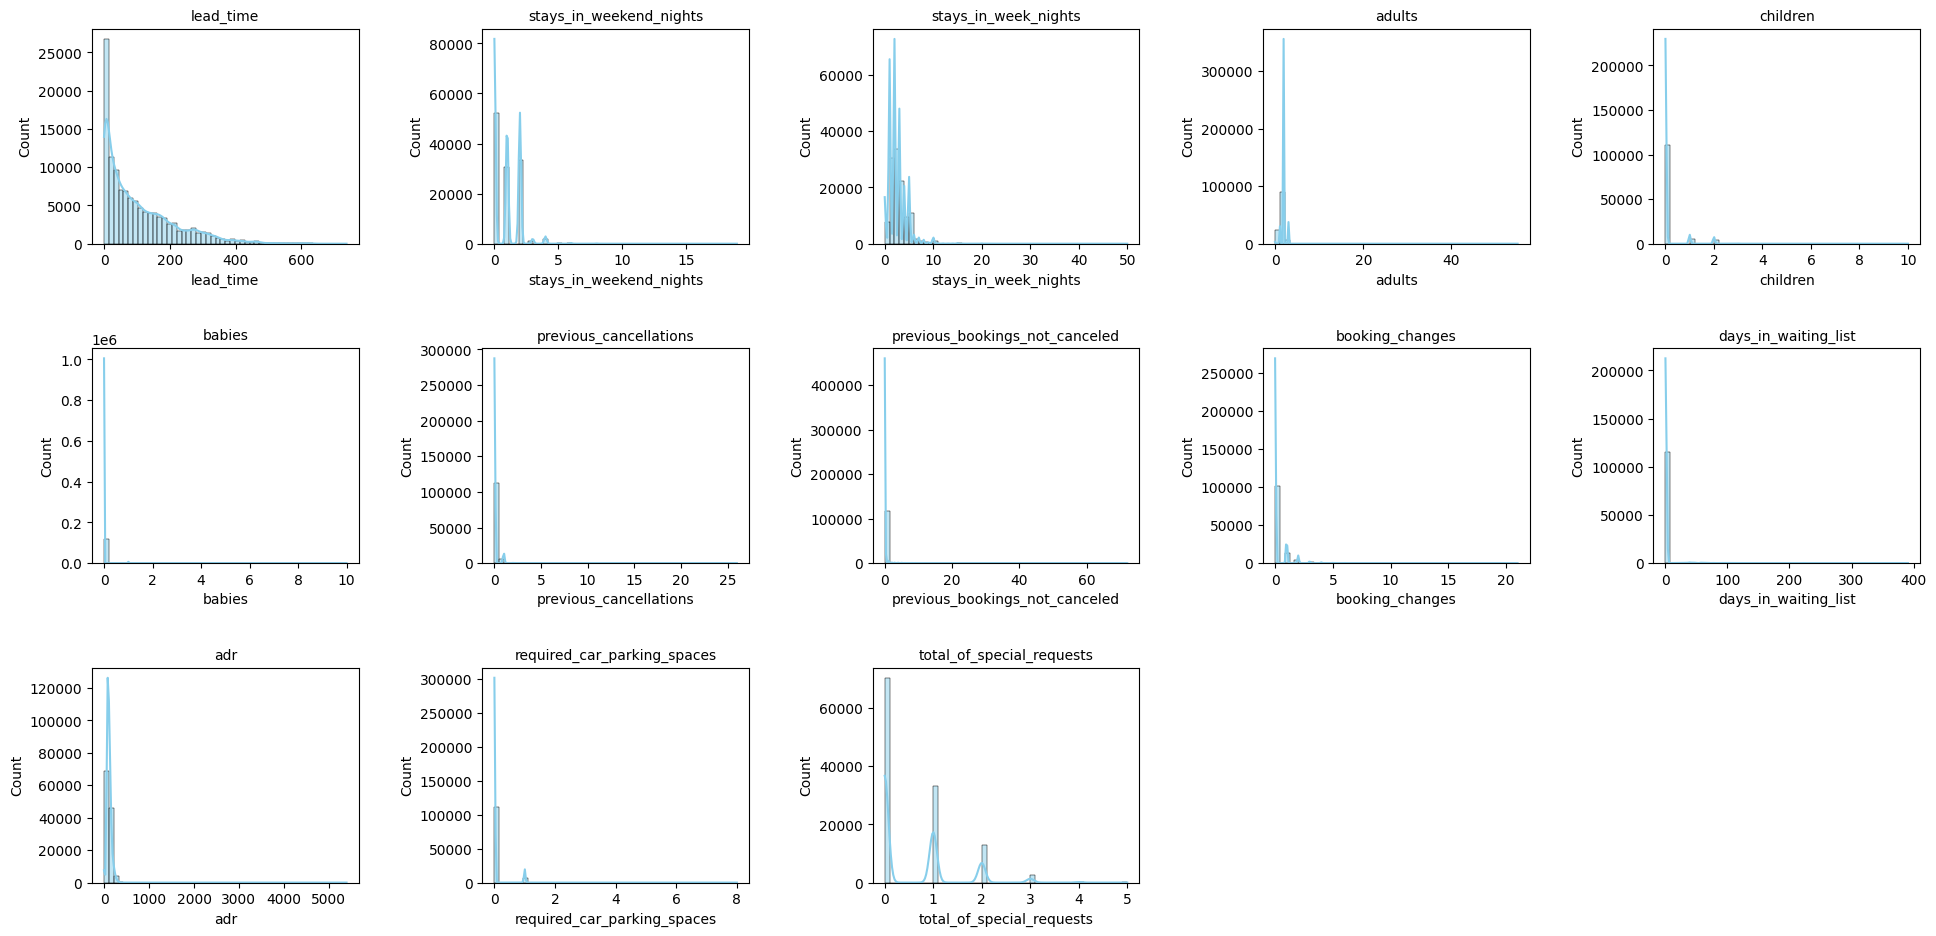

In [34]:
cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
        'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled',
        'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
        'total_of_special_requests']

plt.figure(figsize=(20, 10))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 5, i)
    sns.histplot(data[col], bins=50, kde=True, color="skyblue")
    plt.title(col, fontsize=10)

plt.tight_layout(pad=3.0)
plt.show()


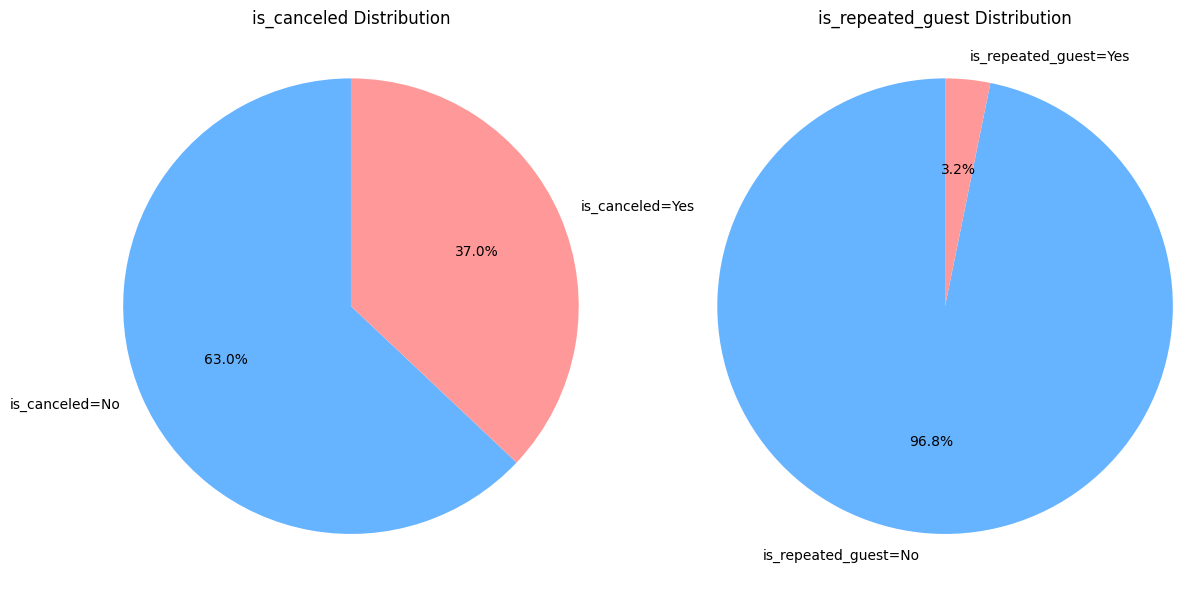

In [35]:
binary_cols = ['is_canceled', 'is_repeated_guest']

plt.figure(figsize=(12, 6))

for i, col in enumerate(binary_cols, 1):
    plt.subplot(1, len(binary_cols), i)
    counts = data[col].value_counts()
    labels = [f"{col}=No", f"{col}=Yes"]
    plt.pie(counts.values, labels=labels, autopct='%1.1f%%', startangle=90, 
            colors=['#66b3ff','#ff9999'])
    plt.title(f'{col} Distribution')
    plt.axis('equal')

plt.tight_layout()
plt.show()


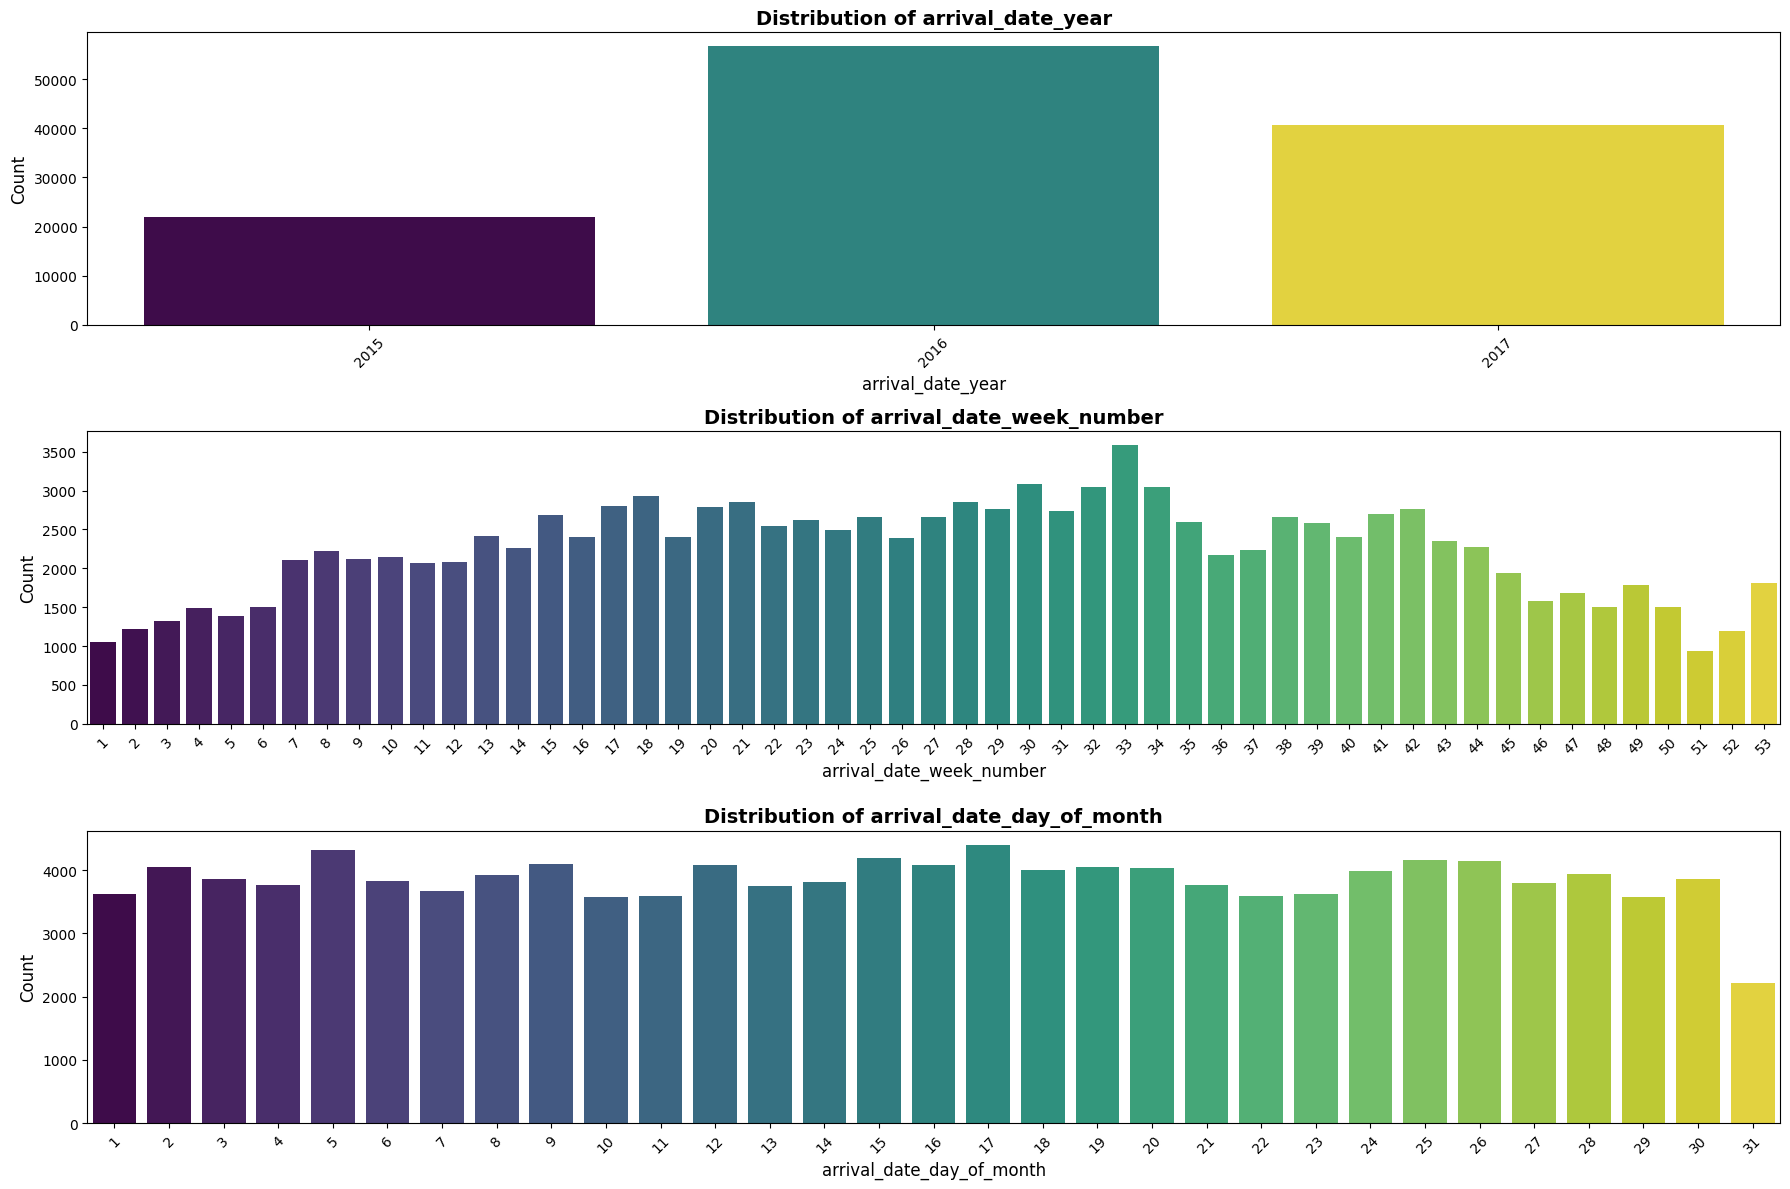

In [36]:
time_cols = ['arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month']

plt.figure(figsize=(18, 12))

for i, col in enumerate(time_cols, 1):
    plt.subplot(3, 1, i)
    sns.countplot(x=data[col], hue=data[col], palette="viridis", legend=False)
    plt.title(f'Distribution of {col}', fontsize=14, weight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Data Quality Issues

After exploring the dataset, the following main data quality issues were identified:

1. **Missing Values**
   - `children`: 4 missing values (≈ 0.00%)
   - `country`: 488 missing values (≈ 0.4%)
   - `agent`: 16,340 missing values (≈ 13.7%)
   - `company`: 112,593 missing values (≈ 94.3%)
   - → Columns `agent` and especially `company` have a high proportion of missing values.

2. **Outliers**
   - Several numerical columns (`lead_time`, `adr`, `previous_cancellations`, `days_in_waiting_list`, etc) contain extreme values that may distort analysis.

3. **Incorrect Data Types**
   - `children` is stored as `float64` but it should be integer.
   - `agent` and `company` are stored as numeric but represent IDs → should be `Int64` or `category`.
   - `reservation_status_date` is stored as `object` → should be `datetime64`.

4. **Skewed Distributions**
   - Columns like `lead_time` and `adr` are highly Right skewed .

## Key Findings from Categorical/Binary Columns

1. **Is Repeated Guest**
   - Only **0.3%** of customers are repeated guests.
   - This shows very low customer loyalty or repeat visits.

2. **Is Canceled**
   - About **37%** of bookings are canceled.
   - This is a high cancellation rate and could significantly impact revenue management and forecasting.

### Arrival Year Analysis

- From **2015 to 2016**, there was a significant increase in hotel bookings (a clear jump in visits).
- In **2017**, the number of bookings slightly decreased compared to 2016.




## Step 2: Data Cleaning 

### Handle Missing Values

In [37]:
data['company'] = data['company'].fillna(0)

In [38]:
data['agent'] = data['agent'].fillna(0)

In [39]:
data['country'] = data['country'].fillna('Unknown')

In [40]:
data['children'] = data['children'].fillna(data['children'].mode())

### Remove Duplicates

In [ ]:
data.duplicated().sum()

np.int64(31994)

In [43]:
data.drop_duplicates(inplace=True)

### Handle Outliers

In [45]:
data['adr'] = data['adr'].clip(upper=1000)


In [ ]:
data['lead_time'] = data['lead_time'].clip(upper=500)

In [47]:
threshold = data['lead_time'].quantile(0.90)
data['lead_time'] = data['lead_time'].clip(upper=threshold)



### Justification for Capping Outliers

I decided to cap the extreme values (like lead_time and adr) instead of dropping those rows. The reason is that very large values can distort the distribution, shift the mean, or negatively impact machine learning models.

The idea is simple: I calculate the 90th percentile (the point below which 90% of the data lies), and then any value above that threshold is replaced with the threshold itself. This way, I don’t lose data, but at the same time I prevent extreme rare cases from dominating the analysis

### Fix Data Types

In [48]:
data['children'] = data['children'].fillna(0).astype(int)
data['agent'] = data['agent'].astype('Int64')
data['company'] = data['company'].astype('Int64')
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])


## Step 3: Feature Engineering & Preprocessing

### Create New Features

In [49]:
data['total_guests'] = data['adults'] + data['children'] + data['babies']
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data['is_family'] = ((data['children'] > 0) | (data['babies'] > 0)).map({True: "Yes", False: "No"})


###  Encode Categorical Variables

In [51]:
data = pd.get_dummies(data, columns=['meal', 'market_segment'], drop_first=True)

country_freq = data['country'].value_counts(normalize=True)
data['country'] = data['country'].map(country_freq)

data = data.drop(['reservation_status', 'reservation_status_date'], axis=1)

train, test = train_test_split(data, test_size=0.2, random_state=42)
